optimizer Adam, keeping everything else the same

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.layers import Dropout, Dense, Flatten, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())

data_dir = '/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project/Dataset'

Name = os.listdir(data_dir)
print(Name)
print(len(Name))
NameLabels = ['Control', 'Stroke']
print(NameLabels)
print(len(NameLabels))

N=list(range(len(Name)))
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/Final_project
['.DS_Store', 'Stroke', 'Control']
3
['Control', 'Stroke']
2


In [3]:
# ResNet and VGG preprocess_input will convert the input images from RGB to BGR, 
# then will zero-center each color channel with respect to the ImageNet dataset, without scaling
preprocess_input = tf.keras.applications.resnet.preprocess_input

# Rescaling the input image
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input
)

validation_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [5]:
for image, label in train_generator:
      print(type(image))
      print(label)
      print(label[0])   # one-hot label
      print(NameLabels[np.argmax(label[0])])  # text label
      # print(NameLabels[np.argmax(label)])  # text label
      print(image[0].shape)
      break

<class 'numpy.ndarray'>
[1. 0. 0. 1. 0. 1.]
1.0
Control
(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.035054915].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.28259215].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..0.1649451].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48501962..-0.1762314].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4771765..-0.14485884].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.48109806..-0.15270199].


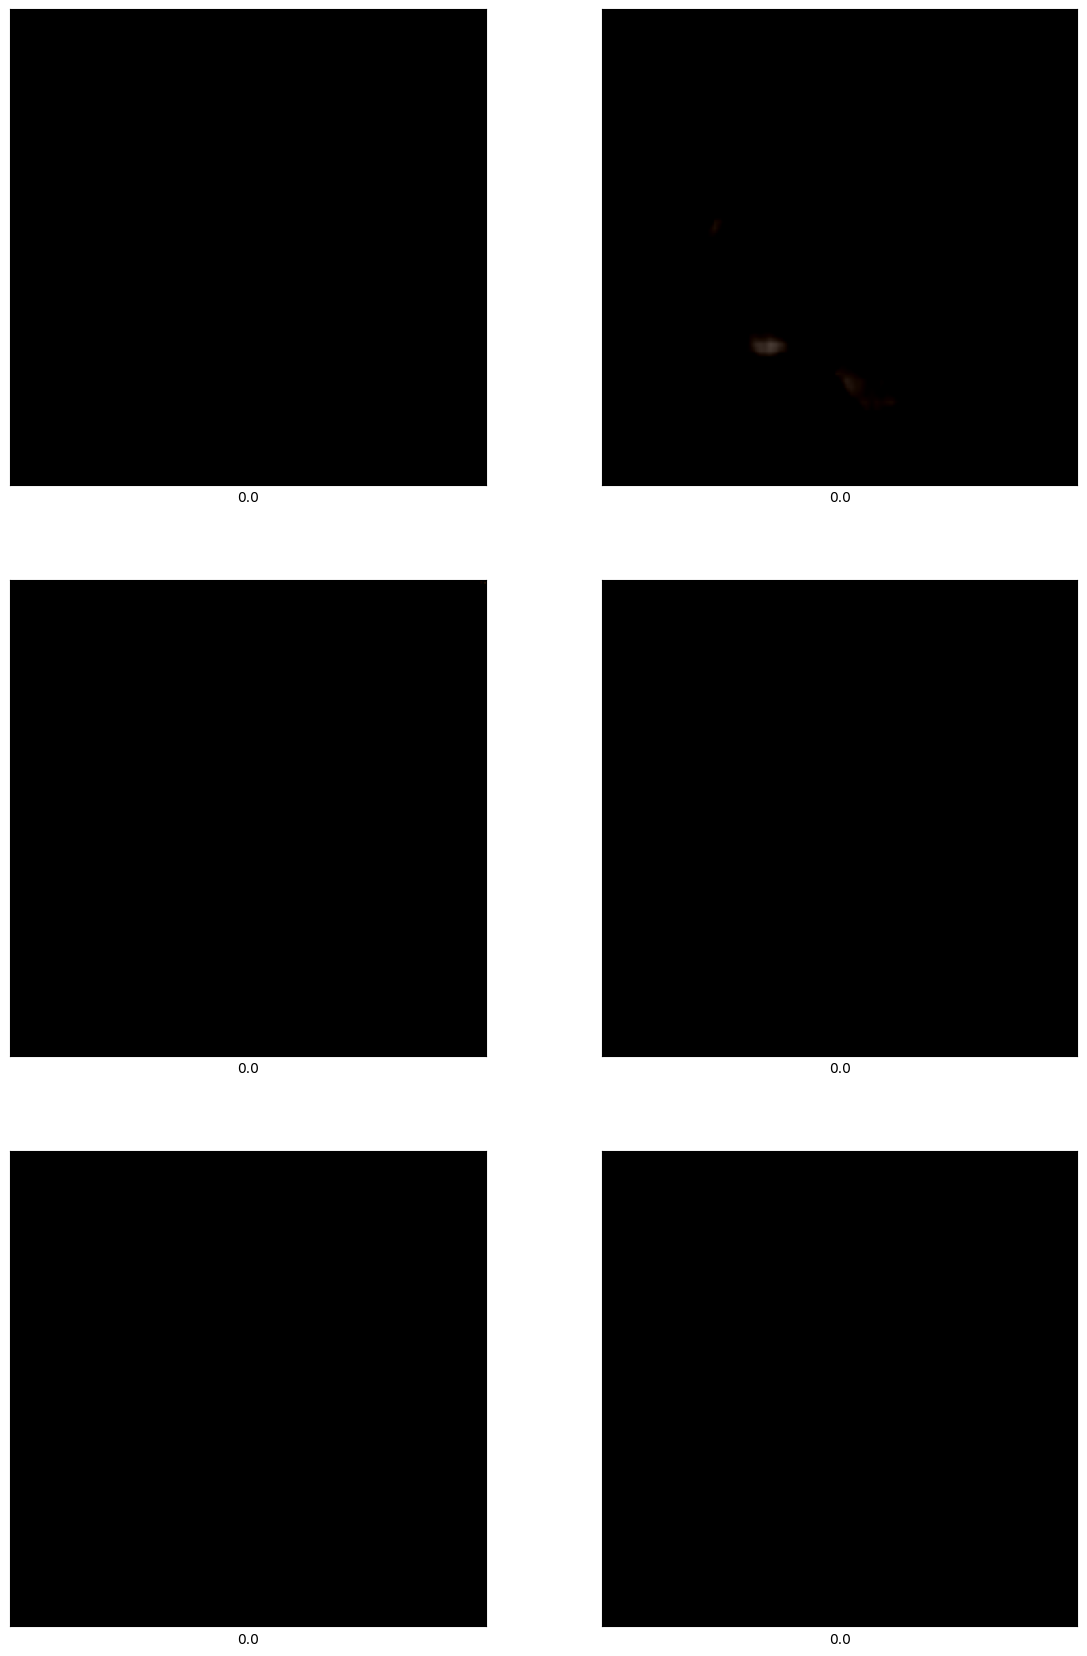

In [6]:
# browse some images
f = plt.figure(figsize=(14, 21))
for p in range(6):
    for image, label in train_generator:
        f.add_subplot(3,2,p+1)
        plt.imshow(image[p])
        # plt.title(NameLabels[np.argmax(label[p])])
        plt.xlabel(label[p], fontsize=10)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        break
plt.show()

# MODEL 0

simple CNN

In [7]:
model = tf.keras.Sequential()
# layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model.add(layers.MaxPooling2D((2, 2)))
# layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
# layer 4
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
# layer 5
model.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.build()

In [9]:
# model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 253, 253, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    14,745,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,802,049 (56.47 MB)

 Trainable params: 14,802,049 (56.47 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 38s 110ms/step - binary_accuracy: 0.6188 - loss: 0.6999 - val_binary_accuracy: 0.4988 - val_loss: 11.7221
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 37s 110ms/step - binary_accuracy: 0.6849 - loss: 0.5763 - val_binary_accuracy: 0.4988 - val_loss: 2.0109
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - binary_accuracy: 0.7689 - loss: 0.4659 - val_binary_accuracy: 0.5461 - val_loss: 1.7732
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - binary_accuracy: 0.8047 - loss: 0.4549 - val_binary_accuracy: 0.5262 - val_loss: 9.2053
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 39s 114ms/step - binary_accuracy: 0.8773 - loss: 0.3557 - val_binary_accuracy: 0.4988 - val_loss: 14.3193
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - binary_accuracy: 0.9190 - loss: 0.2272 - val_binary_accuracy: 0.4988 - val_loss: 11.9667
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - binary_accuracy: 0.9253 - loss: 0.1944 - val_binary_accuracy: 0.4988 - val_loss: 

In [11]:
def plot_loss_accuracy(history, title):
  fig = plt.figure(figsize=(13, 6))
  plt.suptitle(f"Binary classifier, stroke detection based on  MRI images\n\n {title}", fontsize=14)
  ax1 = fig.add_subplot(1,2,1)
  plt.plot(history.history['binary_accuracy'], 'r', label='Training accuracy')
  plt.plot(history.history['val_binary_accuracy'], 'purple', label='Validation accuracy')
  plt.title('Training and validation accuracy', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend(fontsize=12, loc=4)
  plt.grid(True, alpha=0.5)

  ax2 = fig.add_subplot(1,2,2)
  plt.plot(history.history['loss'], 'g', label='Training loss')
  plt.plot(history.history['val_loss'], 'b', label='Validation loss')
  plt.title('Training and validation loss', fontsize=12)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  handles, labels = plt.gca().get_legend_handles_labels()
  order = [1, 0]
  plt.xticks(range(0,30,2), labels=range(1,31,2))
  plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], fontsize=12, loc=4) 
  plt.legend(fontsize=14, loc=7)
  plt.grid(True, alpha=0.4)
  plt.tight_layout()
  plt.show()

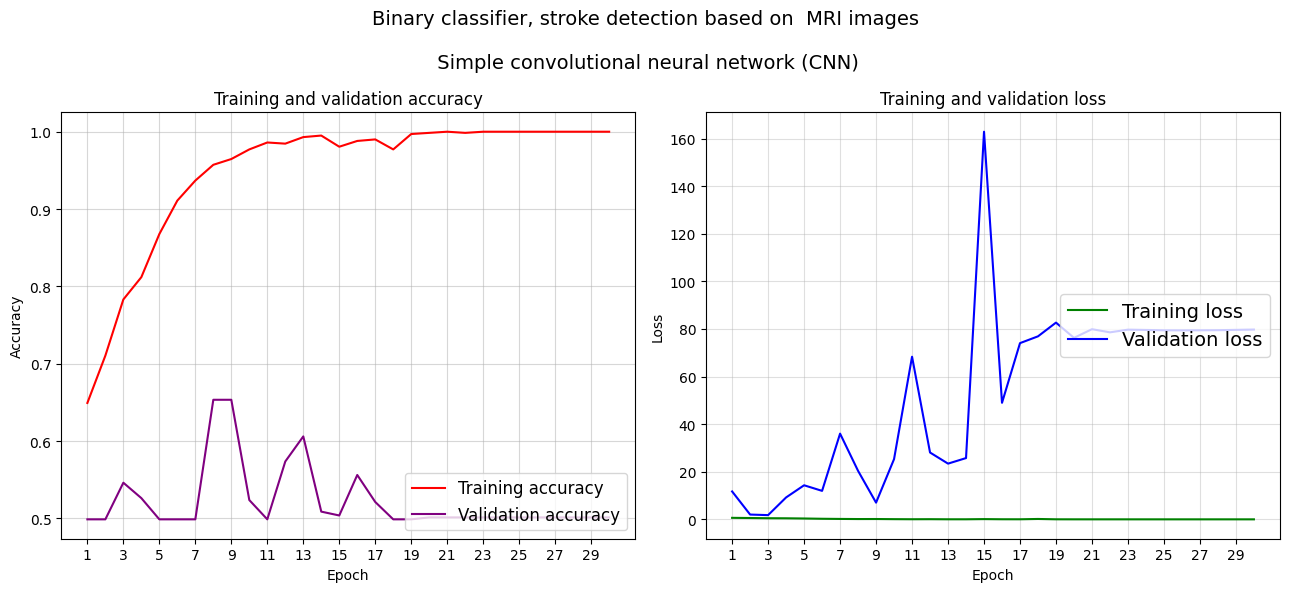

In [13]:
plot_loss_accuracy(history, "Simple convolutional neural network (CNN)")

the model quickly overfit. 

validation accuracy is in broad strokes only slightly better than random chance

# MODEL 1

#### updated simple CNN - model1

the updated simple CNN model is bigger, has an extra layer, more neurons, L2 regularization and dropout added and smaller learning rate

In [14]:
model1 = tf.keras.Sequential()
# layer 1
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape = (255, 255, 3))) # image size is 255x255 with three layers for colors
model1.add(layers.MaxPooling2D((2, 2)))
# layer 2
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 3
model1.add(layers.Conv2D(256, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
# layer 4
model1.add(layers.Conv2D(512, (3, 3), activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
# layer 5
model1.add(layers.Dense(1024, activation='relu', use_bias=True,
    kernel_regularizer =tf.keras.regularizers.l2( 0.01)))
model1.add(Dropout(0.5))
# layer 6
model1.add(layers.Dense(1, activation= 'sigmoid'))

/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# model1.summary()

In [16]:
model1.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

history1 = model1.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 187s 555ms/step - binary_accuracy: 0.5513 - loss: 19.4355 - val_binary_accuracy: 0.4988 - val_loss: 12.6339
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 184s 549ms/step - binary_accuracy: 0.6629 - loss: 7.6264 - val_binary_accuracy: 0.4988 - val_loss: 10.8540
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 184s 547ms/step - binary_accuracy: 0.6924 - loss: 3.8327 - val_binary_accuracy: 0.4988 - val_loss: 11.6855
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 182s 542ms/step - binary_accuracy: 0.7273 - loss: 2.4595 - val_binary_accuracy: 0.4988 - val_loss: 10.4650
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 183s 545ms/step - binary_accuracy: 0.7194 - loss: 1.8372 - val_binary_accuracy: 0.4988 - val_loss: 4.9351
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 182s 541ms/step - binary_accuracy: 0.7483 - loss: 1.4450 - val_binary_accuracy: 0.4963 - val_loss: 2.6690
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 185s 551ms/step - binary_accuracy: 0.7602 - loss: 1.1793 - val_binary_accuracy:

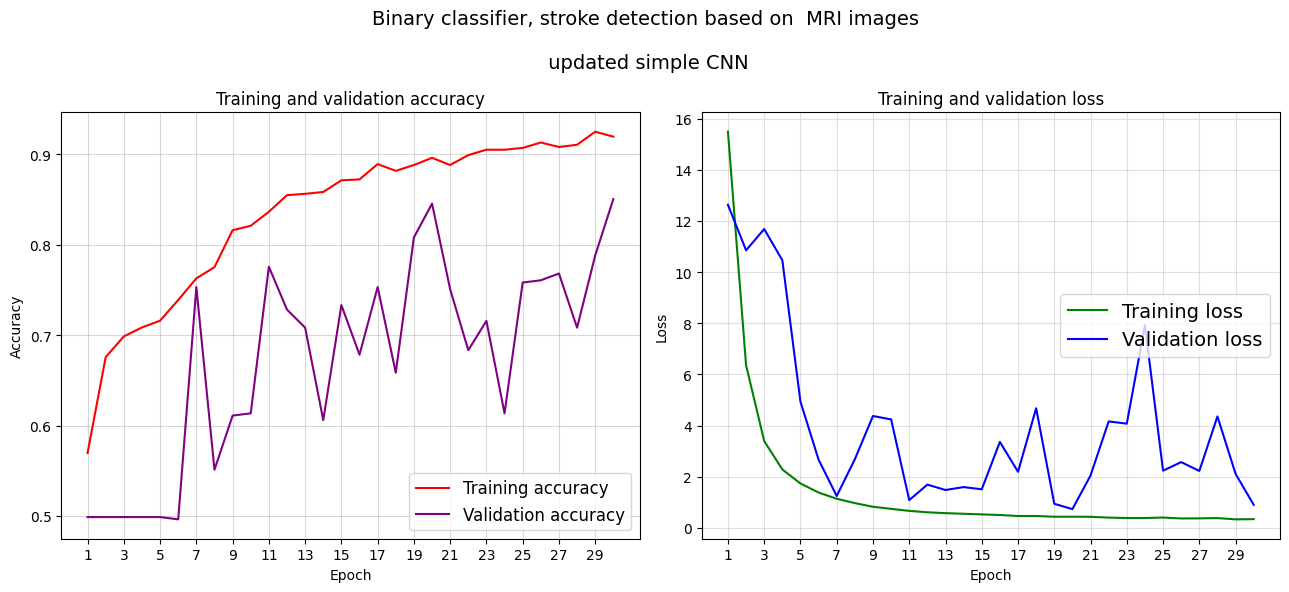

In [17]:
plot_loss_accuracy(history1, "updated simple CNN Adam")

model1 did not overfit as fast as the original model, but the improvement was minor

# PRETRAINED MODELS

I explored four different pretrained models - VGG19, ResNet50, InceptionV3, EfficientNetB0 - and created two versions of each, while keepin the rest of the parameters same:
1. with all layers frozen and 
1. with 3 unfrozen layers

# MODEL 2

#### pretrained model VGG19 (Visual Geometry Group), all layers frozen, model2

In [18]:
# instantiating VGG19 convolutional base
pre_trained_model2 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model2.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model2.summary()

In [19]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model2.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [20]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [21]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model2 = Model(pre_trained_model2.input, x) 

# Print the model summary
# model2.summary()

In [22]:
model2.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model2_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history2 = model2.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 702s 2s/step - binary_accuracy: 0.5475 - loss: 0.6856 - val_binary_accuracy: 0.5761 - val_loss: 0.6892
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 699s 2s/step - binary_accuracy: 0.6376 - loss: 0.6588 - val_binary_accuracy: 0.5387 - val_loss: 0.6899
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 704s 2s/step - binary_accuracy: 0.6302 - loss: 0.6476 - val_binary_accuracy: 0.5761 - val_loss: 0.6875
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 707s 2s/step - binary_accuracy: 0.6325 - loss: 0.6470 - val_binary_accuracy: 0.5711 - val_loss: 0.6888
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 705s 2s/step - binary_accuracy: 0.6362 - loss: 0.6335 - val_binary_accuracy: 0.5636 - val_loss: 0.6897
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 561s 2s/step - binary_accuracy: 0.6436 - loss: 0.6267 - val_binary_accuracy: 0.5661 - val_loss: 0.6912


In [23]:
#the best model2_Adam
best_pretrained2 = keras.models.load_model("model2_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - binary_accuracy: 0.5320 - loss: 0.7005
Validation accuracy: 0.576


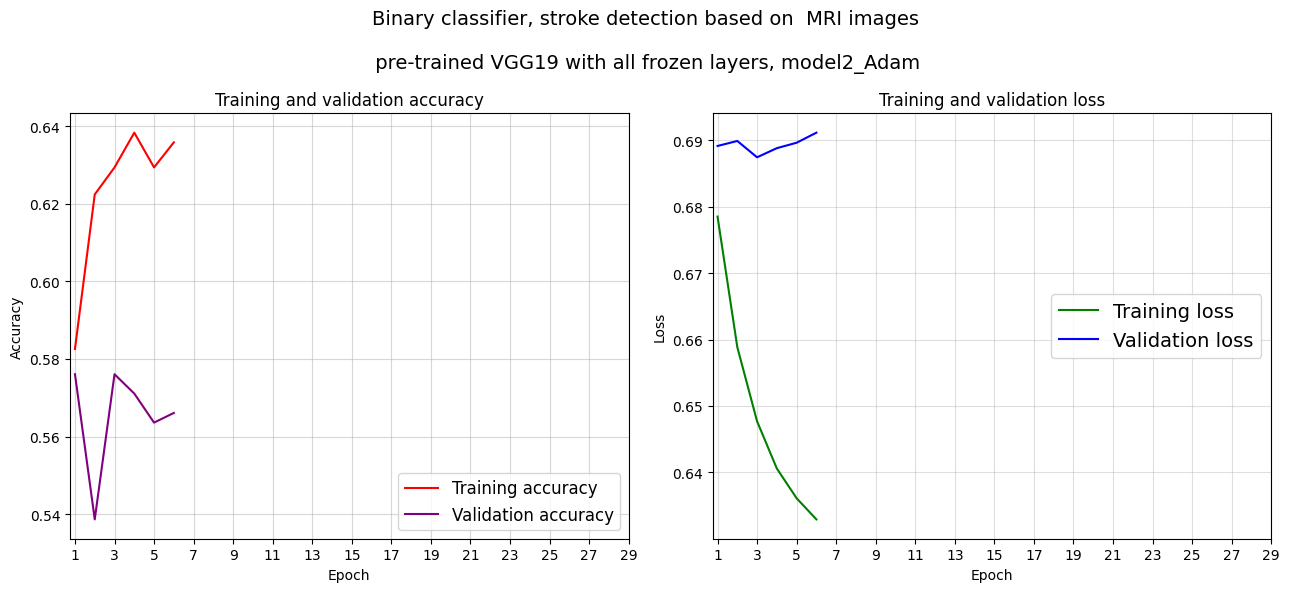

In [24]:
plot_loss_accuracy(history2, "pre-trained VGG19 with all frozen layers, model2_Adam")

outcome of model2 was worse than the baseline

# MODEL 3_ADAM

#### pretrained model VGG19 (Visual Geometry Group), 16 frozen and 3 unfrozen layers, model3

In [25]:
# instantiating VGG19 convolutional base
pre_trained_model3 = keras.applications.vgg19.VGG19(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the first 16 layers, leave last 3 trainable
pre_trained_model3.trainable = True
for layer in pre_trained_model3.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model3.summary()

In [26]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model3.get_layer('block5_pool')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 512)


In [27]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [28]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model3 = Model(pre_trained_model3.input, x) 

# Print the model summary. See your dense network connected at the end.
# model3.summary()

In [29]:
model3.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model3_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history3 = model3.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - binary_accuracy: 0.6246 - loss: 0.6427 - val_binary_accuracy: 0.5935 - val_loss: 0.6555
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 648s 2s/step - binary_accuracy: 0.6873 - loss: 0.5671 - val_binary_accuracy: 0.6933 - val_loss: 0.5795
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - binary_accuracy: 0.7520 - loss: 0.4991 - val_binary_accuracy: 0.7606 - val_loss: 0.5068
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 554s 2s/step - binary_accuracy: 0.8153 - loss: 0.4153 - val_binary_accuracy: 0.8204 - val_loss: 0.4215
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 552s 2s/step - binary_accuracy: 0.8297 - loss: 0.3675 - val_binary_accuracy: 0.8379 - val_loss: 0.3669
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - binary_accuracy: 0.8363 - loss: 0.3553 - val_binary_accuracy: 0.8703 - val_loss: 0.3211
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - binary_accuracy: 0.8715 - loss: 0.2930 - val_binary_accuracy: 0.8953 - val_loss: 0.2756

In [30]:
#the best model3_Adam
best_pretrained2 = keras.models.load_model("model3_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - binary_accuracy: 0.9821 - loss: 0.0416
Validation accuracy: 0.983


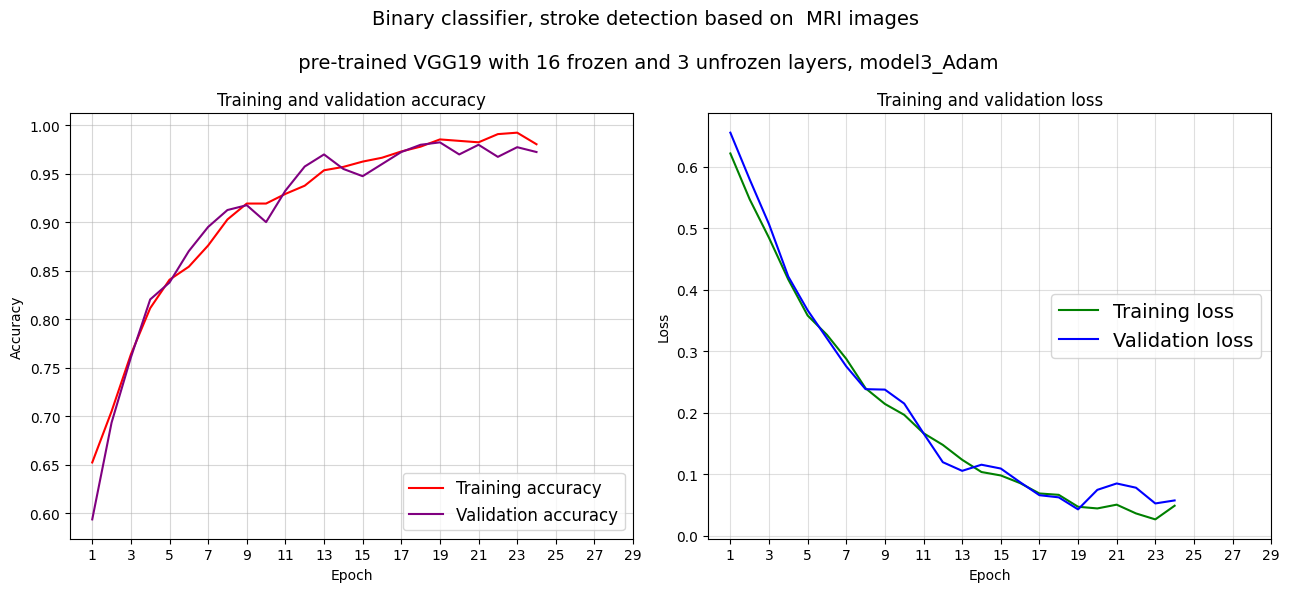

In [31]:
plot_loss_accuracy(history3, "pre-trained VGG19 with 16 frozen and 3 unfrozen layers, model3_Adam")

model 3 outcome was a big improvement over previous models. improvement may continue if there were more epochs.

# MODEL 4_ADAM

#### pretrained model: ResNet50, all frozen layers, model4

In [32]:
# instantiating ResNet50 convolutional base
pre_trained_model4 = keras.applications.ResNet50(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model4.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model4.summary()

In [33]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model4.get_layer('conv5_block3_out') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [34]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [35]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model4 = Model(pre_trained_model4.input, x) 

# Print the model summary. See your dense network connected at the end.
# model4.summary()

In [36]:
model4.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model4_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history4 = model4.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 314s 914ms/step - binary_accuracy: 0.4976 - loss: 0.6970 - val_binary_accuracy: 0.5012 - val_loss: 0.6935
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 297s 885ms/step - binary_accuracy: 0.5253 - loss: 0.6920 - val_binary_accuracy: 0.5137 - val_loss: 0.6908
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - binary_accuracy: 0.5596 - loss: 0.6848 - val_binary_accuracy: 0.5087 - val_loss: 0.6902
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 439s 1s/step - binary_accuracy: 0.5765 - loss: 0.6795 - val_binary_accuracy: 0.5362 - val_loss: 0.6884
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - binary_accuracy: 0.5869 - loss: 0.6753 - val_binary_accuracy: 0.5910 - val_loss: 0.6881
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 401s 1s/step - binary_accuracy: 0.6017 - loss: 0.6696 - val_binary_accuracy: 0.5835 - val_loss: 0.6872
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 298s 888ms/step - binary_accuracy: 0.6111 - loss: 0.6686 - val_binary_accuracy: 0.5761 - val_los

In [37]:
#the best model4_Adam
best_pretrained2 = keras.models.load_model("model4_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 44s 609ms/step - binary_accuracy: 0.5167 - loss: 0.6881
Validation accuracy: 0.531


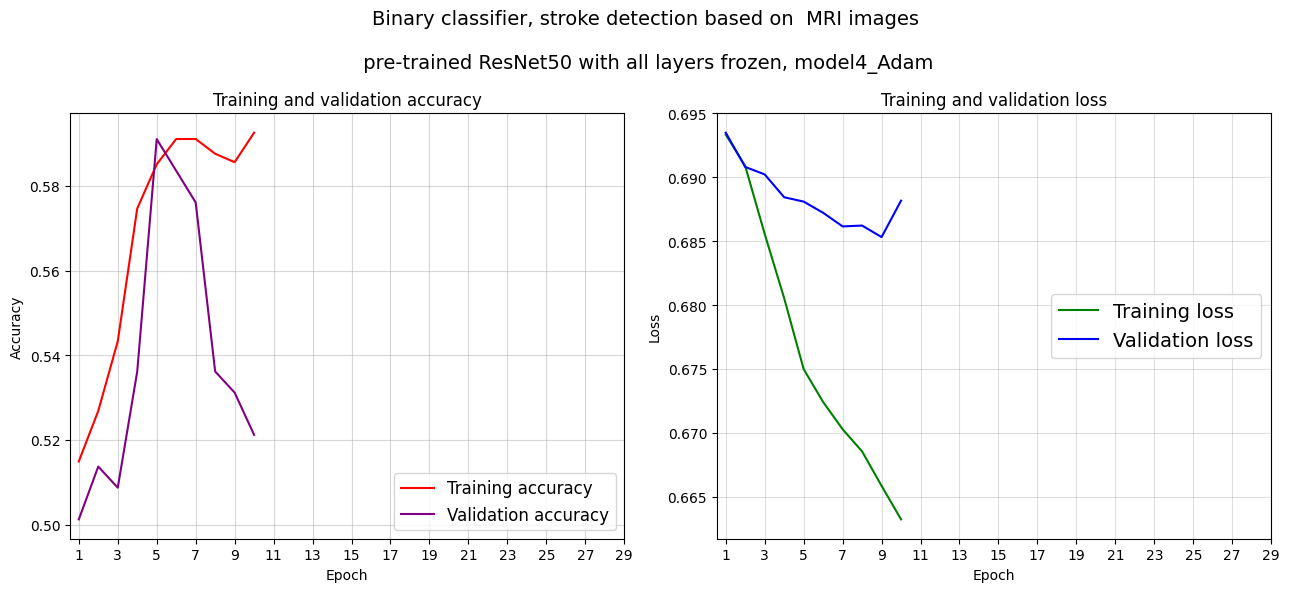

In [38]:
plot_loss_accuracy(history4, "pre-trained ResNet50 with all layers frozen, model4_Adam")

model4 outcome was worse than baseline model0, no better than random chance

# MODEL 5_ADAM

#### pretrained model: ResNet50, 3 unfrozen layers, model5

In [39]:
# instantiating ResNet50 convolutional base
pre_trained_model5 = keras.applications.ResNet50(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model5.trainable = True
for layer in pre_trained_model5.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model5.summary()

In [40]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model5.get_layer('conv5_block3_out')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 2048)


In [41]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [42]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model5 = Model(pre_trained_model5.input, x) 

# Print the model summary. See your dense network connected at the end.
# model5.summary()

In [43]:
model5.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model5_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history5 = model5.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 307s 896ms/step - binary_accuracy: 0.5585 - loss: 0.6801 - val_binary_accuracy: 0.5212 - val_loss: 0.6911
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 291s 868ms/step - binary_accuracy: 0.6014 - loss: 0.6573 - val_binary_accuracy: 0.5312 - val_loss: 0.6835
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 293s 874ms/step - binary_accuracy: 0.6094 - loss: 0.6483 - val_binary_accuracy: 0.5362 - val_loss: 0.6866
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 292s 869ms/step - binary_accuracy: 0.6245 - loss: 0.6372 - val_binary_accuracy: 0.5786 - val_loss: 0.6824
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 292s 872ms/step - binary_accuracy: 0.6066 - loss: 0.6464 - val_binary_accuracy: 0.5786 - val_loss: 0.6949
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 295s 878ms/step - binary_accuracy: 0.6402 - loss: 0.6422 - val_binary_accuracy: 0.5611 - val_loss: 0.6822
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 290s 866ms/step - binary_accuracy: 0.6461 - loss: 0.6324 - val_binary_accuracy: 0.52

In [44]:
#the best model5_Adam
best_pretrained2 = keras.models.load_model("model5_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 43s 603ms/step - binary_accuracy: 0.5477 - loss: 0.6843
Validation accuracy: 0.561


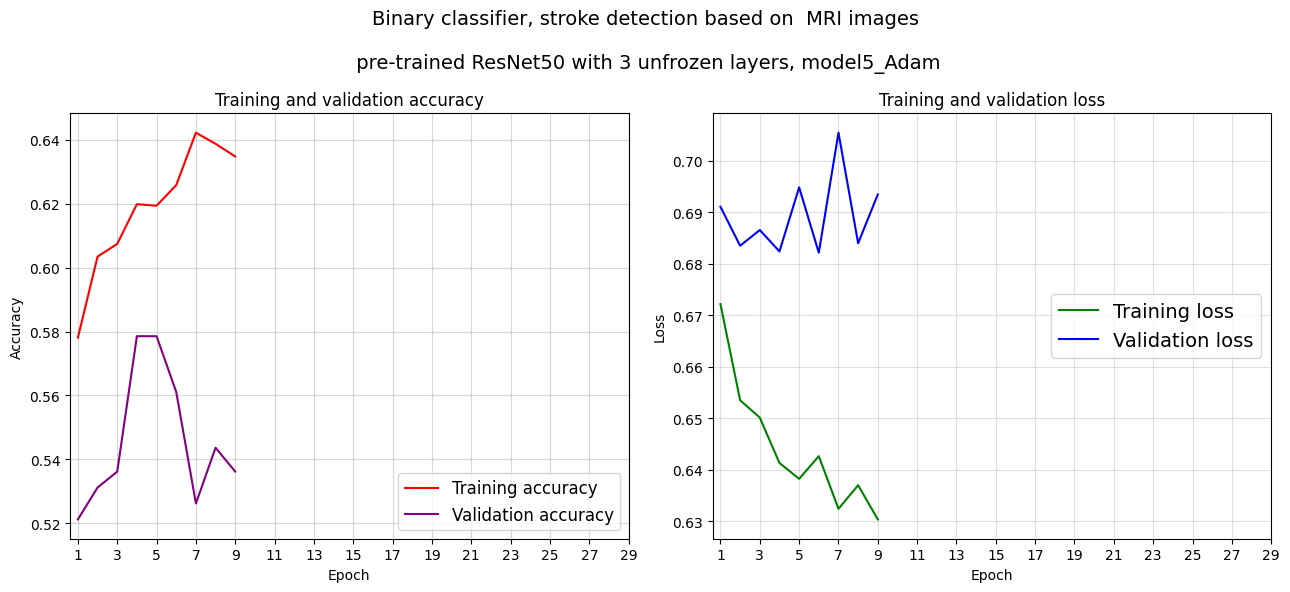

In [45]:
plot_loss_accuracy(history5, "pre-trained ResNet50 with 3 unfrozen layers, model5_Adam")

model 5 performed worse than baseline

# MODEL 6_ADAM

#### pretrained model: InceptionV3, all frozen layers, model6

In [46]:
# instantiating InceptionV3 convolutional base
pre_trained_model6 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model6.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model6.summary()

In [47]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model6.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [48]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [49]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model6 = Model(pre_trained_model6.input, x) 

# Print the model summary. See your dense network connected at the end.
# model6.summary()

In [50]:
# Inceptionv3 preproces_input will scale input pixels between -1 and 1, 

preprocess_input_inc = tf.keras.applications.inception_v3.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_inc = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input_inc
)

validation_datagen_inc = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator_inc = train_datagen.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_inc = validation_datagen_inc.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.


Found 401 images belonging to 2 classes.


In [51]:
model6.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model6_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history6 = model6.fit(
    train_generator_inc,
    epochs=30,
    validation_data=validation_generator_inc,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 556ms/step - binary_accuracy: 0.6400 - loss: 0.6385 - val_binary_accuracy: 0.6783 - val_loss: 0.5886
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 189s 564ms/step - binary_accuracy: 0.7924 - loss: 0.4867 - val_binary_accuracy: 0.7232 - val_loss: 0.5493
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 572ms/step - binary_accuracy: 0.7887 - loss: 0.4581 - val_binary_accuracy: 0.7531 - val_loss: 0.5043
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 193s 574ms/step - binary_accuracy: 0.8194 - loss: 0.4215 - val_binary_accuracy: 0.7681 - val_loss: 0.5023
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 572ms/step - binary_accuracy: 0.8428 - loss: 0.3852 - val_binary_accuracy: 0.7805 - val_loss: 0.4667
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 192s 573ms/step - binary_accuracy: 0.8621 - loss: 0.3590 - val_binary_accuracy: 0.8155 - val_loss: 0.4325
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 190s 565ms/step - binary_accuracy: 0.8482 - loss: 0.3586 - val_binary_accuracy: 0.8229 - val_lo

In [52]:
#the best model6_Adam
best_pretrained2 = keras.models.load_model("model6_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator_inc) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 377ms/step - binary_accuracy: 0.8738 - loss: 0.3317
Validation accuracy: 0.863


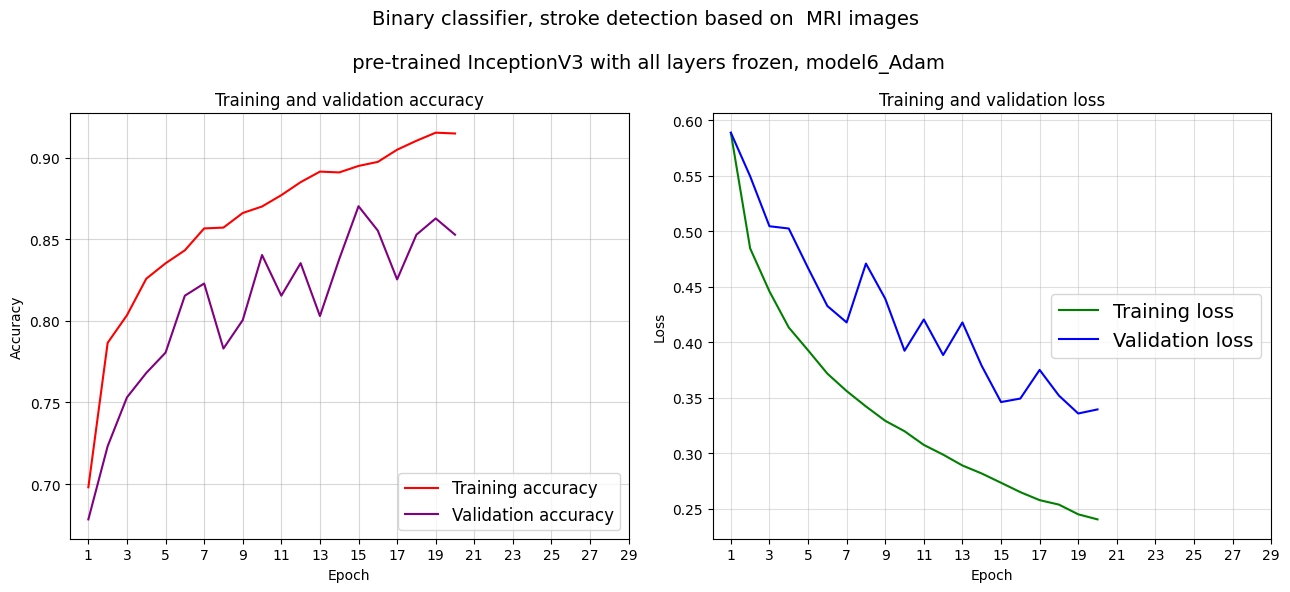

In [53]:
plot_loss_accuracy(history6, "pre-trained InceptionV3 with all layers frozen, model6_Adam")

model 6 is an improvement over the baseline, achieving around 85% accuracy

# MODEL 7_ADAM

#### pretrained model: InceptionV3, 3 unfrozen layers, model7

In [54]:
# instantiating InceptionV3 convolutional base
pre_trained_model7 = keras.applications.InceptionV3(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model7.trainable = True
for layer in pre_trained_model7.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model7.summary()

In [55]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model7.get_layer('mixed10') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 2048)


In [56]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [57]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model7 = Model(pre_trained_model7.input, x) 

# Print the model summary. See your dense network connected at the end.
# model7.summary()

In [58]:
model7.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model7_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history7 = model7.fit(
    train_generator_inc,
    epochs=30,
    validation_data=validation_generator_inc,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 185s 529ms/step - binary_accuracy: 0.6319 - loss: 0.6413 - val_binary_accuracy: 0.7157 - val_loss: 0.5707
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 179s 532ms/step - binary_accuracy: 0.7848 - loss: 0.4819 - val_binary_accuracy: 0.7357 - val_loss: 0.5258
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 178s 529ms/step - binary_accuracy: 0.8115 - loss: 0.4438 - val_binary_accuracy: 0.7681 - val_loss: 0.5015
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 177s 526ms/step - binary_accuracy: 0.8215 - loss: 0.4141 - val_binary_accuracy: 0.7805 - val_loss: 0.4783
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 175s 522ms/step - binary_accuracy: 0.8427 - loss: 0.3836 - val_binary_accuracy: 0.7905 - val_loss: 0.4699
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 170s 506ms/step - binary_accuracy: 0.8442 - loss: 0.3779 - val_binary_accuracy: 0.8030 - val_loss: 0.4547
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 178s 531ms/step - binary_accuracy: 0.8504 - loss: 0.3564 - val_binary_accuracy: 0.80

In [59]:
#the best model7_Adam
best_pretrained2 = keras.models.load_model("model7_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator_inc) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 30s 386ms/step - binary_accuracy: 0.8810 - loss: 0.3029
Validation accuracy: 0.873


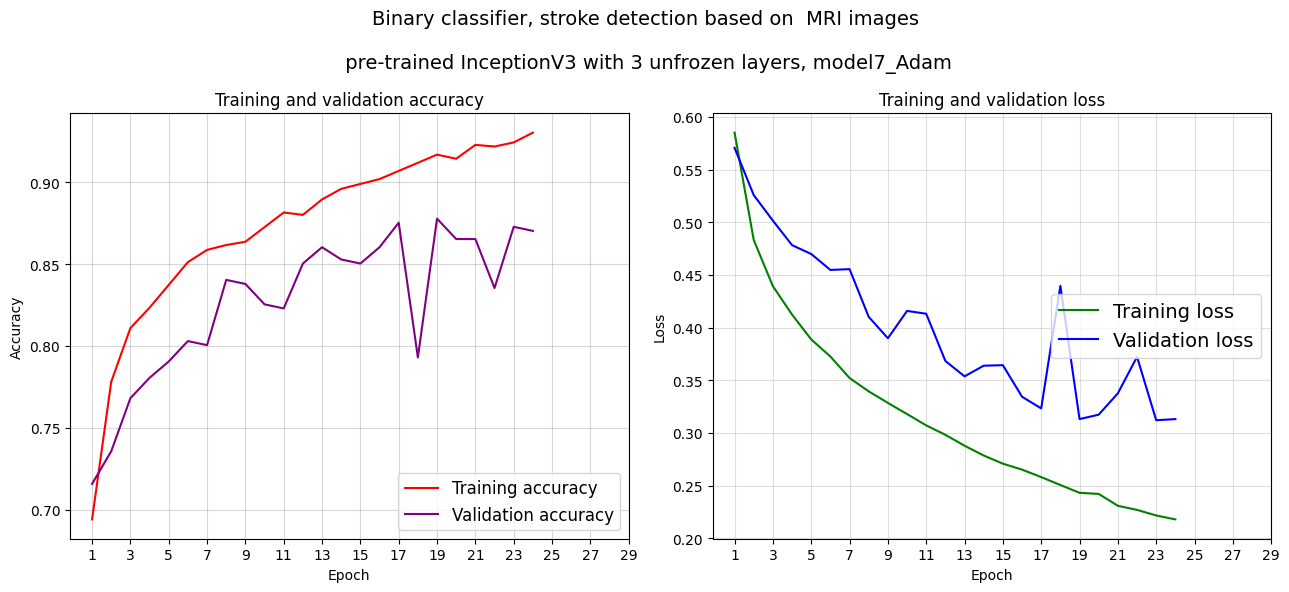

In [60]:
plot_loss_accuracy(history7, "pre-trained InceptionV3 with 3 unfrozen layers, model7_Adam")

model7 is very similar to model 6, improvement over baseline. training last 3 layers does not seem to add

# MODEL 8_ADAM

#### pretrained model: EfficientNetB0, all frozen layers, model8

In [61]:
# instantiating EfficientNetB0 convolutional base
pre_trained_model8 = keras.applications.EfficientNetB0(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights of the layers
for layer in pre_trained_model8.layers:
    layer.trainable = False

# printing out the summary of the pretrained model
# pre_trained_model8.summary()

In [62]:
# get the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model8.get_layer('top_activation')

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 1280)


In [63]:
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

# Add a GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)

In [64]:
# Add a final sigmmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model8 = Model(pre_trained_model8.input, x) 

# Print the model summary. See your dense network connected at the end.
# model8.summary()

In [65]:
# EfficientNet preprocess_input is a pass-through function. 
# EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range

preprocess_input_en = tf.keras.applications.efficientnet.preprocess_input

# Rescaling the input image and Data Augmentation
train_datagen_en = ImageDataGenerator(
    rescale = 1./255,
    preprocessing_function=preprocess_input_en
)

validation_datagen_en = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

train_generator_en = train_datagen_en.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "training")

validation_generator_en = validation_datagen_en.flow_from_directory(
    data_dir,
    target_size=(255,255),
    class_mode='binary',
    batch_size=6,
    subset = "validation")

Found 2010 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [66]:
model8.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model8_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history8 = model8.fit(
    train_generator_en,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30


/Users/katrin/Documents/Kool/DU/DeepLearning_4531/dl_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


335/335 ━━━━━━━━━━━━━━━━━━━━ 129s 351ms/step - binary_accuracy: 0.5144 - loss: 0.6952 - val_binary_accuracy: 0.4988 - val_loss: 0.6935
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 116s 345ms/step - binary_accuracy: 0.5093 - loss: 0.6934 - val_binary_accuracy: 0.5012 - val_loss: 0.6943
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 114s 340ms/step - binary_accuracy: 0.5084 - loss: 0.6934 - val_binary_accuracy: 0.5012 - val_loss: 0.6931
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 118s 351ms/step - binary_accuracy: 0.5274 - loss: 0.6930 - val_binary_accuracy: 0.5012 - val_loss: 0.6932
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 115s 340ms/step - binary_accuracy: 0.5145 - loss: 0.6942 - val_binary_accuracy: 0.5012 - val_loss: 0.6932
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 107s 317ms/step - binary_accuracy: 0.4995 - loss: 0.6943 - val_binary_accuracy: 0.5012 - val_loss: 0.6961
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 116s 345ms/step - binary_accuracy: 0.4929 - loss: 0.6957 - val_binary_accuracy: 0.4988 - val_lo

In [67]:
#the best model8_Adam
best_pretrained2 = keras.models.load_model("model8_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 227ms/step - binary_accuracy: 0.5262 - loss: 0.6926
Validation accuracy: 0.499


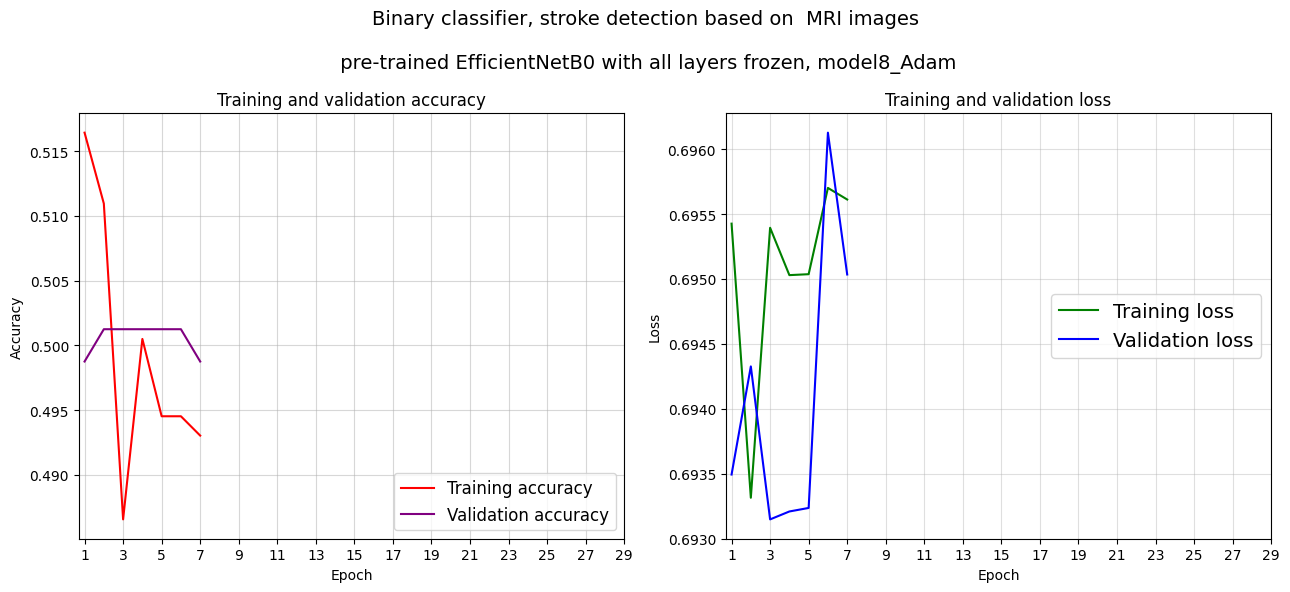

In [68]:
plot_loss_accuracy(history8, "pre-trained EfficientNetB0 with all layers frozen, model8_Adam")

# MODEL 8 OUTCOME

# MODEL 9_ADAM

#### pretrained model: EfficientNetB0, 3 unfrozen layers, model9

In [69]:
# instantiating EfficientNetB0 convolutional base
pre_trained_model9 = keras.applications.EfficientNetB0(
    input_shape = (255, 255, 3), 
    include_top = False, 
    weights="imagenet"
)

# Freeze the weights, leave last 3 trainable
pre_trained_model9.trainable = True
for layer in pre_trained_model9.layers[:-4]:  # loop through all but the last three layers
    layer.trainable = False  # make them not trainable

# printing out the summary of the pretrained model
# pre_trained_model9.summary()

In [70]:
# getting the last layer from the pre_trained model to use for traning
last_layer = pre_trained_model9.get_layer('top_activation') 

print('last layer output shape: ', last_layer.output.shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 1280)


In [71]:
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(last_output)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)  

x = layers.GlobalAveragePooling2D()(x)

In [72]:
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)           

# Append the dense network to the base model
model9 = Model(pre_trained_model9.input, x) 

# Print the model summary. See your dense network connected at the end.
# model9.summary()

In [73]:
model9.compile(
    optimizer = Adam(learning_rate=1e-5), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['binary_accuracy']
)

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_binary_accuracy",
        patience=5),
    keras.callbacks.ModelCheckpoint(
        filepath="model9_Adam.keras",
        save_best_only=True,
        monitor="val_loss")
]

history9 = model9.fit(
    train_generator_en,
    epochs=30,
    validation_data=validation_generator_en,
    callbacks=callbacks
)

Epoch 1/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 135s 370ms/step - binary_accuracy: 0.5029 - loss: 0.6980 - val_binary_accuracy: 0.5012 - val_loss: 0.6931
Epoch 2/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 125s 372ms/step - binary_accuracy: 0.5189 - loss: 0.6971 - val_binary_accuracy: 0.4988 - val_loss: 0.6952
Epoch 3/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 124s 370ms/step - binary_accuracy: 0.4822 - loss: 0.6991 - val_binary_accuracy: 0.5012 - val_loss: 0.6932
Epoch 4/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 124s 369ms/step - binary_accuracy: 0.5111 - loss: 0.6953 - val_binary_accuracy: 0.5012 - val_loss: 0.6938
Epoch 5/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 124s 368ms/step - binary_accuracy: 0.5078 - loss: 0.6985 - val_binary_accuracy: 0.5711 - val_loss: 0.6931
Epoch 6/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 124s 369ms/step - binary_accuracy: 0.4807 - loss: 0.7012 - val_binary_accuracy: 0.4988 - val_loss: 0.6937
Epoch 7/30
335/335 ━━━━━━━━━━━━━━━━━━━━ 122s 362ms/step - binary_accuracy: 0.5082 - loss: 0.6975 - val_binary_accuracy: 0.49

In [74]:
#the best model9_Adam
best_pretrained2 = keras.models.load_model("model9_Adam.keras") 
val_loss, val_acc = best_pretrained2.evaluate(validation_generator_en) 
print(f"Validation accuracy: {val_acc:.3f}")

67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 224ms/step - binary_accuracy: 0.4694 - loss: 0.9035
Validation accuracy: 0.499


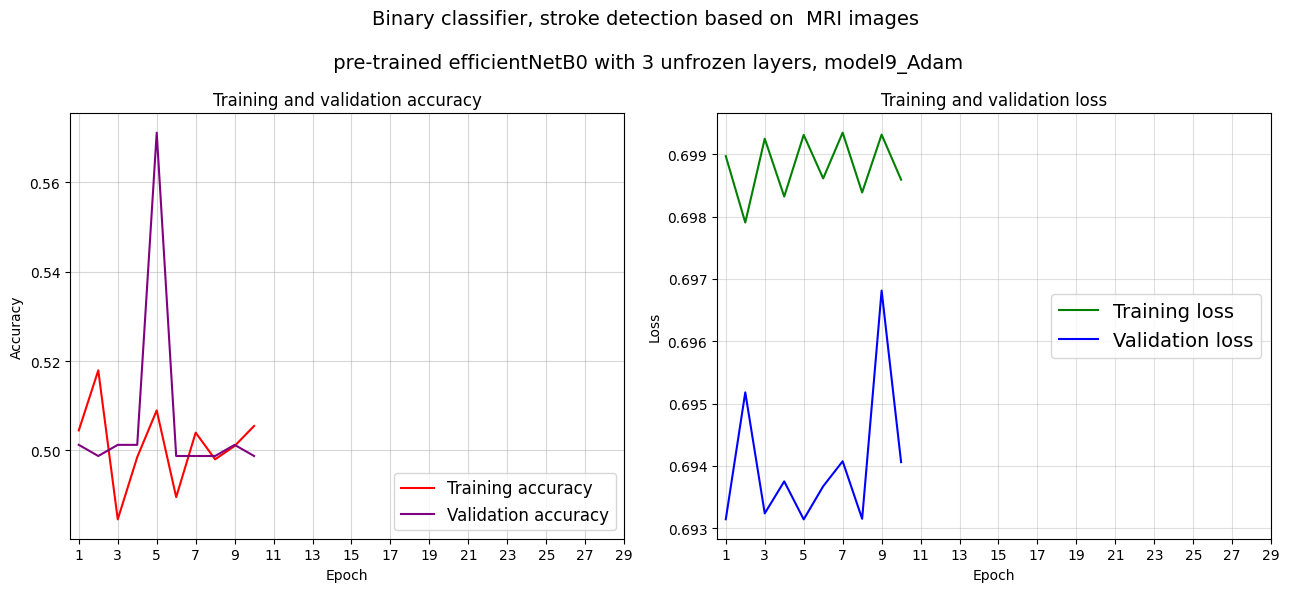

In [75]:
plot_loss_accuracy(history9, "pre-trained efficientNetB0 with 3 unfrozen layers, model9_Adam")

# MODEL 9 OUTCOME